# UnSupervised Learning R4 Project2 City Car Fuel Consumption

##### The purpose of the case study is to classify a given silhouette as one of three different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Four "Corgie" model vehicles were used for the experiment: a double-decker bus, Chevrolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The points distribution for this case is as follows:

Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance) - 10 points
Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy. (10 points)

In [3]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline


In [4]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

##### EDA & Pre-processing 

In [5]:
# reading the CSV file into pandas dataframe
vehicles_df = pd.read_csv("vehicle.csv") 

In [6]:
# Check top few records to get a feel of the data structure
vehicles_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [7]:
vehicles_df.describe().transpose()     

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [6]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [16]:
vehicles_df.shape

(846, 19)

In [17]:
if vehicles_df.isnull().values.any() == False:
    print("There are no nulls/NaN values in our data frame")
else:
    print("There are nulls in dataframe")

There are nulls in dataframe


##### removing all non-numeric entries from numeric columns

In [18]:
non_numeric_columns=vehicles_df.select_dtypes(include=["object"]).columns

In [25]:
for cols in non_numeric_columns:
    vehicles_df[cols].str.isnumeric().value_counts()
    print("Nos of non numeric column :",cols)
    print(vehicles_df[cols].loc[vehicles_df[cols].str.isnumeric() == False])

Nos of non numeric column : class
0      van
1      van
2      car
3      van
4      bus
      ... 
841    car
842    van
843    car
844    car
845    van
Name: class, Length: 846, dtype: object


###### Only Class  is non numeric column

### changing all null values to median

In [26]:
numeric_columns=vehicles_df.select_dtypes(include=["float64","int64"]).columns
float_columns=vehicles_df.select_dtypes(include=["float64"]).columns
int_columns=vehicles_df.select_dtypes(include=["int64"]).columns
for cols in numeric_columns:
    print("Column ",cols)
    collist = vehicles_df[cols].loc[vehicles_df[cols] != np.nan]
    colmedian = collist.median()
    print("median to be replaced is",colmedian)
    if cols in int_columns:
        colmedian=round(colmedian)
    vehicles_df[cols].fillna(colmedian, inplace = True)

Column  compactness
median to be replaced is 93.0
Column  circularity
median to be replaced is 44.0
Column  distance_circularity
median to be replaced is 80.0
Column  radius_ratio
median to be replaced is 167.0
Column  pr.axis_aspect_ratio
median to be replaced is 61.0
Column  max.length_aspect_ratio
median to be replaced is 8.0
Column  scatter_ratio
median to be replaced is 157.0
Column  elongatedness
median to be replaced is 43.0
Column  pr.axis_rectangularity
median to be replaced is 20.0
Column  max.length_rectangularity
median to be replaced is 146.0
Column  scaled_variance
median to be replaced is 179.0
Column  scaled_variance.1
median to be replaced is 363.5
Column  scaled_radius_of_gyration
median to be replaced is 173.5
Column  scaled_radius_of_gyration.1
median to be replaced is 71.5
Column  skewness_about
median to be replaced is 6.0
Column  skewness_about.1
median to be replaced is 11.0
Column  skewness_about.2
median to be replaced is 188.0
Column  hollows_ratio
median to 

In [27]:
for col in vehicles_df.columns:
    print("For column",col)
    print("Median = ", np.median(vehicles_df[col]))
    print("Mean = ", np.mean(vehicles_df[col]))
    print("Mode = ", vehicles_df[col].mode())

For column compactness
Median =  93.0
Mean =  93.67848699763593
Mode =  0    89
dtype: int64
For column circularity
Median =  44.0
Mean =  44.82387706855792
Mode =  0    43.0
dtype: float64
For column distance_circularity
Median =  80.0
Mean =  82.10047281323877
Mode =  0    66.0
dtype: float64
For column radius_ratio
Median =  167.0
Mean =  168.87470449172577
Mode =  0    197.0
dtype: float64
For column pr.axis_aspect_ratio
Median =  61.0
Mean =  61.677304964539005
Mode =  0    64.0
dtype: float64
For column max.length_aspect_ratio
Median =  8.0
Mean =  8.567375886524824
Mode =  0    7
dtype: int64
For column scatter_ratio
Median =  157.0
Mean =  168.88770685579198
Mode =  0    150.0
dtype: float64
For column elongatedness
Median =  43.0
Mean =  40.93617021276596
Mode =  0    31.0
1    45.0
dtype: float64
For column pr.axis_rectangularity
Median =  20.0
Mean =  20.580378250591018
Mode =  0    19.0
dtype: float64
For column max.length_rectangularity
Median =  146.0
Mean =  147.99881796

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [28]:
vehicles_numeric_cols_df = pd.DataFrame(vehicles_df, columns=numeric_columns)

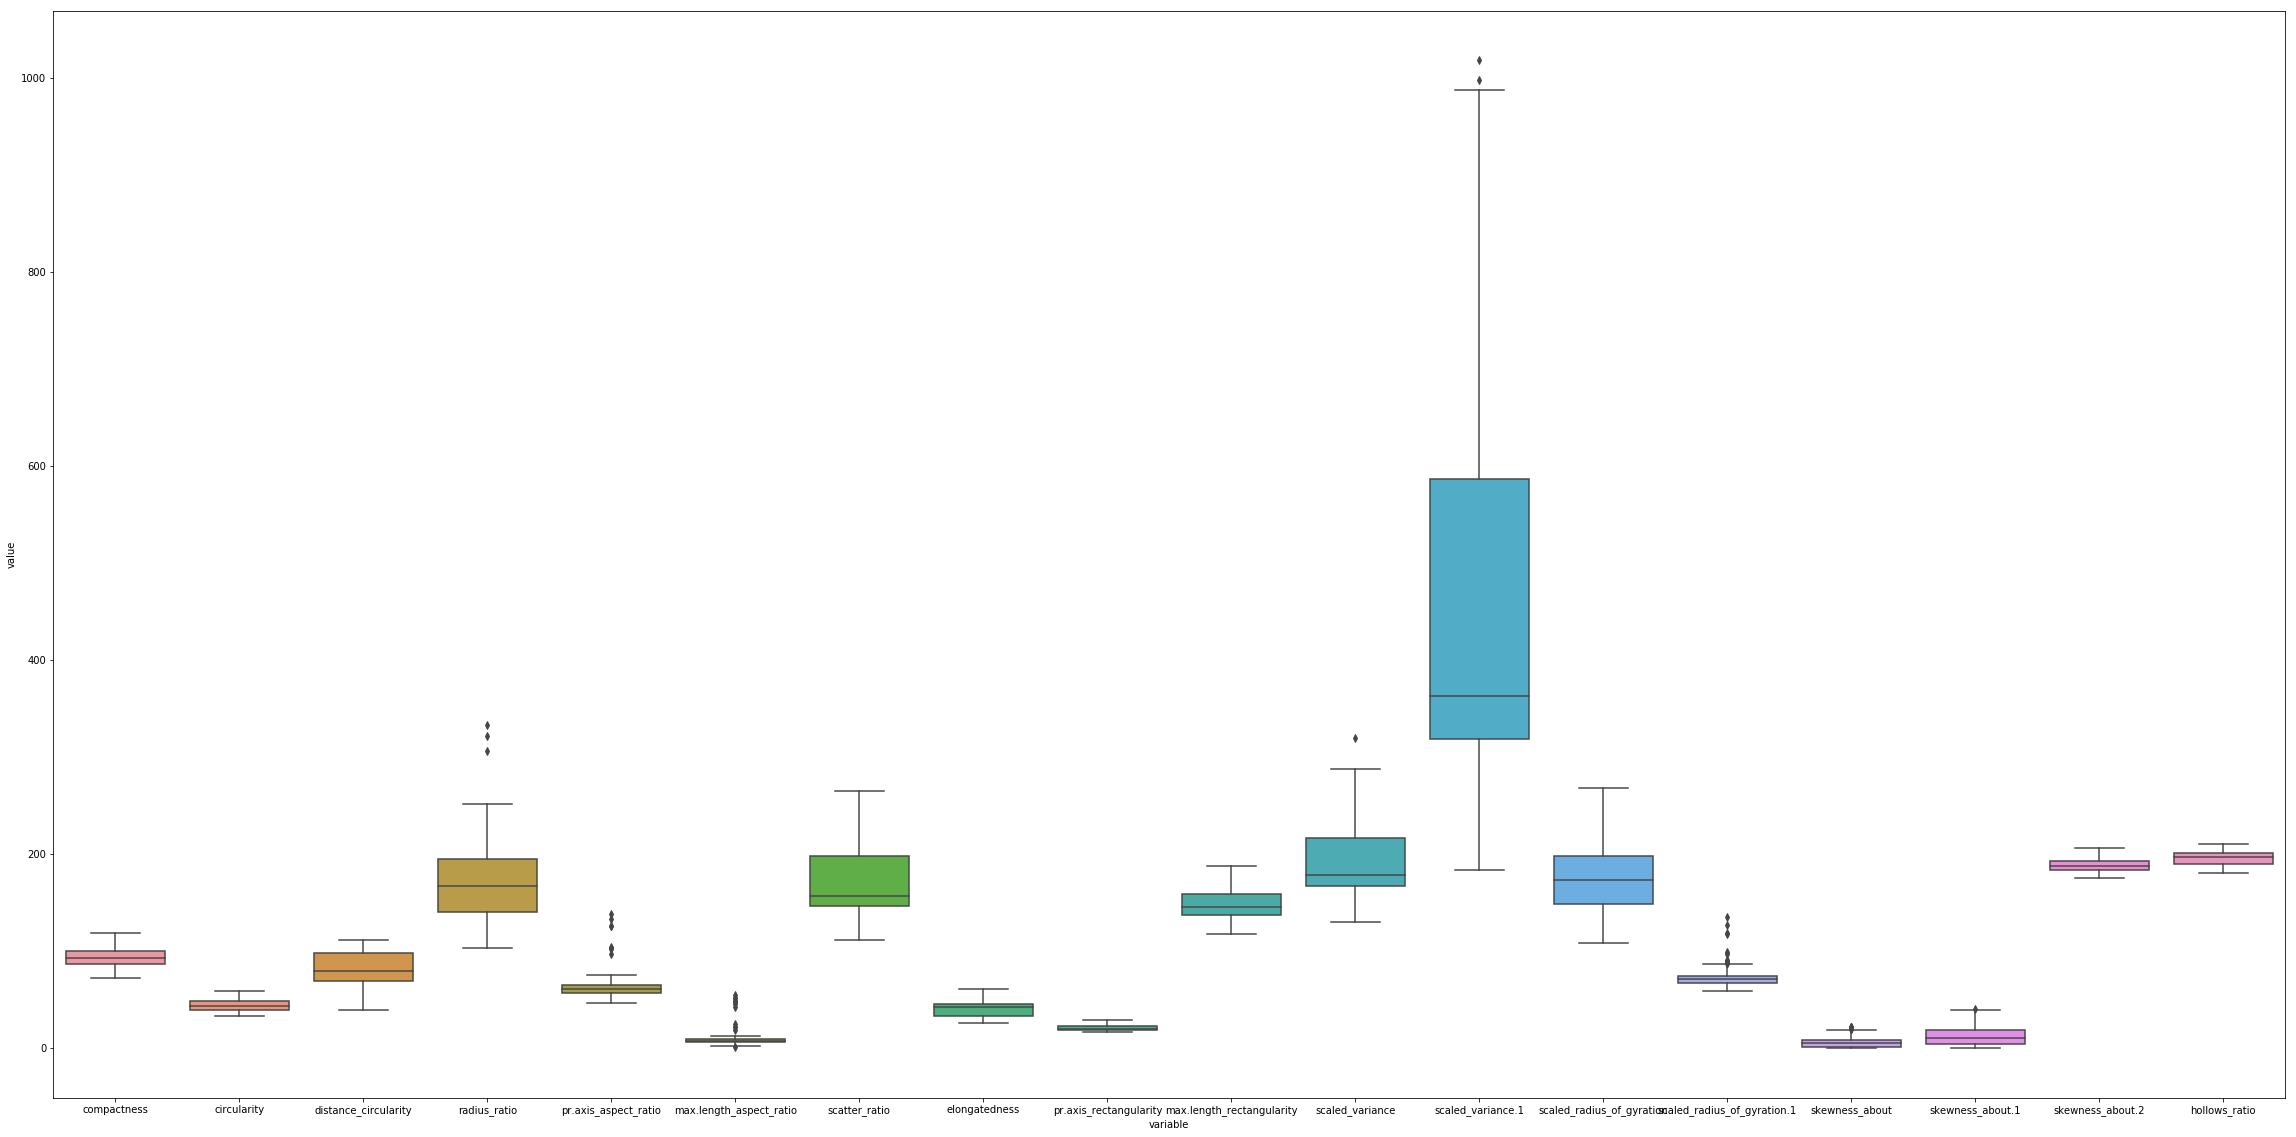

In [29]:
plt.rcParams['figure.figsize']=(40,20)
sns.boxplot(x="variable", y="value", data=pd.melt(vehicles_numeric_cols_df))

### There are many outliers and need to be removed

In [30]:
#function to detect outlier using z-score
def detect_outlier(data_1):

    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    outliers=[]    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

### Dropping outliers from original dataframe 

In [35]:
for col in numeric_columns:
    print("Outlier data points using Zscore for ",col)
    values=detect_outlier(vehicles_df[col])
    print(values)
    vehicles_df.drop(vehicles_df.loc[vehicles_df[col].apply(lambda x: x in values)].index,axis=0,inplace=True)
    print("dropped")
    print("")   


Outlier data points using Zscore for  compactness
[]
dropped

Outlier data points using Zscore for  circularity
[]
dropped

Outlier data points using Zscore for  distance_circularity
[]
dropped

Outlier data points using Zscore for  radius_ratio
[]
dropped

Outlier data points using Zscore for  pr.axis_aspect_ratio
[]
dropped

Outlier data points using Zscore for  max.length_aspect_ratio
[]
dropped

Outlier data points using Zscore for  scatter_ratio
[]
dropped

Outlier data points using Zscore for  elongatedness
[]
dropped

Outlier data points using Zscore for  pr.axis_rectangularity
[28.0]
dropped

Outlier data points using Zscore for  max.length_rectangularity
[]
dropped

Outlier data points using Zscore for  scaled_variance
[]
dropped

Outlier data points using Zscore for  scaled_variance.1
[]
dropped

Outlier data points using Zscore for  scaled_radius_of_gyration
[268.0]
dropped

Outlier data points using Zscore for  scaled_radius_of_gyration.1
[]
dropped

Outlier data points usi

In [36]:
# Let us look at the target column which is 'Class' to understand how the data is distributed amongst the various values
PredictColumn="class"
vehicles_df.groupby(PredictColumn).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
car,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416
van,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192


In [21]:
vehicles_df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
compactness,808.0,93.363861,7.918812,73.0,87.00,93.0,99.00,116.0
circularity,808.0,44.646040,6.044114,33.0,40.00,44.0,49.00,59.0
distance_circularity,808.0,81.675743,15.510841,40.0,70.00,79.0,96.00,112.0
radius_ratio,808.0,167.222772,31.772774,104.0,140.00,165.5,194.00,246.0
pr.axis_aspect_ratio,808.0,61.214109,5.598942,47.0,57.00,61.0,65.00,76.0
max.length_aspect_ratio,808.0,8.118812,2.065409,2.0,7.00,8.0,10.00,13.0
scatter_ratio,808.0,167.491337,31.569163,112.0,146.00,157.0,196.00,247.0
elongatedness,808.0,41.165842,7.646445,27.0,34.00,43.0,46.00,61.0
pr.axis_rectangularity,808.0,20.464109,2.440103,17.0,19.00,20.0,22.25,27.0
max.length_rectangularity,808.0,147.564356,14.385843,118.0,136.00,146.0,158.00,188.0


##  EDA - Univariant Analysis 

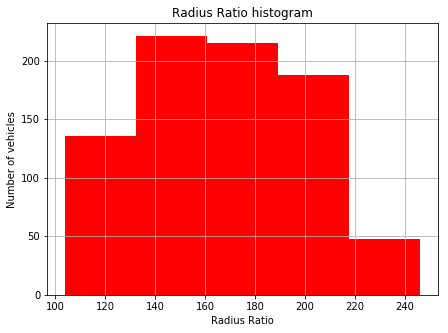

In [22]:
plt.rcParams['figure.figsize']=(7,5)
vehicles_df.radius_ratio[np.abs(vehicles_df.radius_ratio-vehicles_df.radius_ratio.mean())<=(3*vehicles_df.radius_ratio.std())].hist(bins=5,color='red');
plt.title("Radius Ratio histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Radius Ratio');

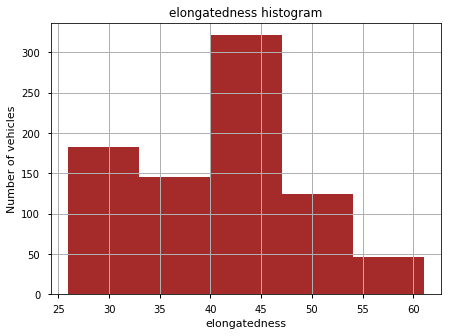

In [127]:
vehicles_df['elongatedness'].hist(bins=5,color='brown');
plt.title("elongatedness histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('elongatedness');

In [ ]:
vehicles_df['class'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Class diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Type of vehicles');

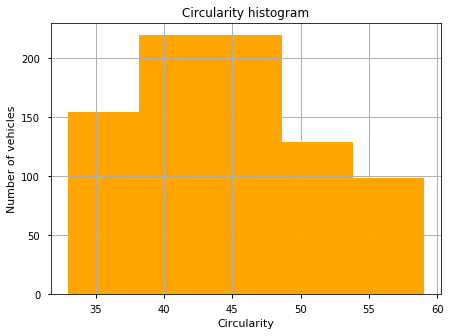

In [128]:
vehicles_df['circularity'].hist(bins=5,color='orange');
plt.title("Circularity histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Circularity');

In [ ]:
vehicles_df['max.length_aspect_ratio'].value_counts().plot(kind='bar',color='purple')
plt.title("Max Length Aspect Ratio")
plt.ylabel('Number of vehicles')
plt.xlabel('MaxLength Aspect Ratio');

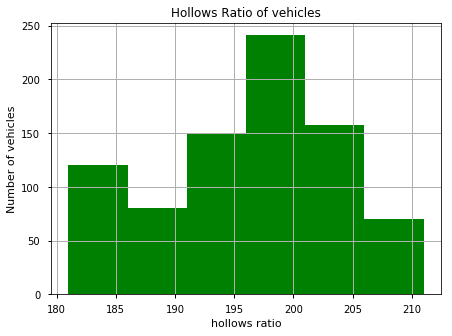

In [129]:
vehicles_df['hollows_ratio'].hist(bins=6,color='green');
plt.title("Hollows Ratio of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('hollows ratio');

In [23]:
non_numeric_columns=vehicles_df.select_dtypes(include=["object"]).columns

In [24]:
from sklearn import preprocessing
for c in non_numeric_columns:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(vehicles_df[c].values))
        vehicles_df[c] = lbl.transform(list(vehicles_df[c].values))

In [25]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 845
Data columns (total 19 columns):
compactness                    808 non-null int64
circularity                    808 non-null float64
distance_circularity           808 non-null float64
radius_ratio                   808 non-null float64
pr.axis_aspect_ratio           808 non-null float64
max.length_aspect_ratio        808 non-null int64
scatter_ratio                  808 non-null float64
elongatedness                  808 non-null float64
pr.axis_rectangularity         808 non-null float64
max.length_rectangularity      808 non-null int64
scaled_variance                808 non-null float64
scaled_variance.1              808 non-null float64
scaled_radius_of_gyration      808 non-null float64
scaled_radius_of_gyration.1    808 non-null float64
skewness_about                 808 non-null float64
skewness_about.1               808 non-null float64
skewness_about.2               808 non-null float64
hollows_ratio    

##  EDA - Bi-variant Analysis 

### Heatmap

In [131]:
corr = vehicles_df.corr()
corr

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.683346,0.785825,0.753391,0.230720,0.526782,0.809062,-0.784304,0.810891,0.672468,0.789110,0.812266,0.572843,-0.295069,0.219609,0.159401,0.322098,0.401045
circularity,0.683346,1.000000,0.791953,0.649236,0.226600,0.588064,0.853182,-0.821712,0.851185,0.964761,0.815168,0.844197,0.933513,0.026653,0.144890,-0.016234,-0.088371,0.072751
distance_circularity,0.785825,0.791953,1.000000,0.816170,0.275071,0.697995,0.908439,-0.909823,0.898032,0.770326,0.889867,0.892453,0.700243,-0.288259,0.105400,0.268331,0.164190,0.363425
radius_ratio,0.753391,0.649236,0.816170,1.000000,0.679044,0.481288,0.804634,-0.851934,0.780656,0.585680,0.813178,0.794871,0.561484,-0.431510,0.051554,0.187497,0.437181,0.527293
pr.axis_aspect_ratio,0.230720,0.226600,0.275071,0.679044,1.000000,0.142129,0.242598,-0.335855,0.214610,0.172038,0.264652,0.233008,0.188410,-0.322214,-0.048419,-0.022117,0.406086,0.417744
max.length_aspect_ratio,0.526782,0.588064,0.697995,0.481288,0.142129,1.000000,0.540636,-0.537653,0.542337,0.674198,0.461326,0.504945,0.440151,-0.349138,0.100965,0.153293,0.071920,0.405508
scatter_ratio,0.809062,0.853182,0.908439,0.804634,0.242598,0.540636,1.000000,-0.973414,0.989130,0.808985,0.977300,0.993014,0.789411,-0.056811,0.066984,0.213272,0.036103,0.167339
elongatedness,-0.784304,-0.821712,-0.909823,-0.851934,-0.335855,-0.537653,-0.973414,1.000000,-0.951115,-0.771558,-0.968883,-0.957802,-0.759037,0.138655,-0.046525,-0.185281,-0.139805,-0.253984
pr.axis_rectangularity,0.810891,0.851185,0.898032,0.780656,0.214610,0.542337,0.989130,-0.951115,1.000000,0.812819,0.962151,0.987295,0.786242,-0.042010,0.075968,0.215502,0.012215,0.149910
max.length_rectangularity,0.672468,0.964761,0.770326,0.585680,0.172038,0.674198,0.808985,-0.771558,0.812819,1.000000,0.752669,0.796688,0.866565,0.006134,0.134459,0.000665,-0.086308,0.105519


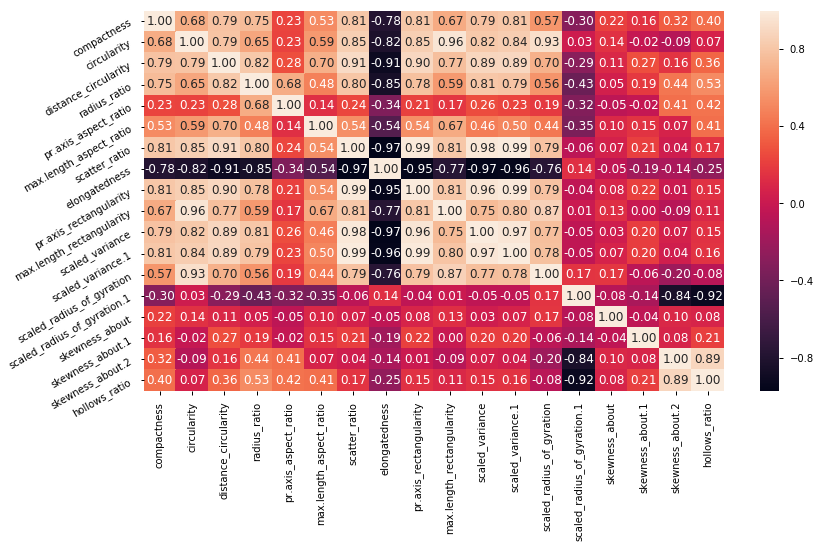

In [132]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

### Pair Plots

In [ ]:

sns.pairplot(vehicles_df, diag_kind='kde')   # to plot density curve instead of histogram

## Inference: from the above gausian curves there seems to be 2-3 major clusters possible

In [ ]:
plt.rcParams['figure.figsize']=(23,5)
ax = sns.boxplot(x="circularity", y="pr.axis_rectangularity", data=vehicles_df)

### as the circularity increases axis rectangularity also increases, so there is a good correlation

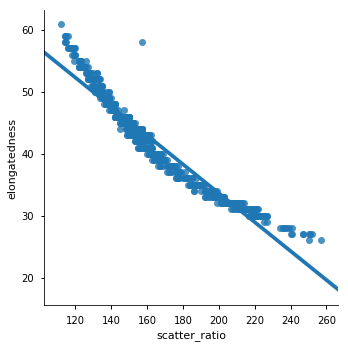

In [133]:
plt.rcParams['figure.figsize']=(3,3)
g = sns.lmplot('scatter_ratio',"elongatedness", vehicles_df);

### Scatter ratio and eelongatedness are linearly correlated

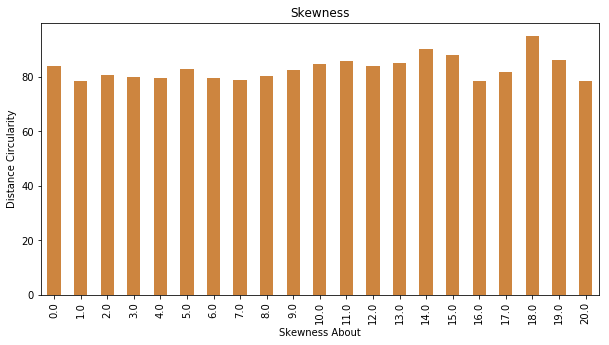

In [37]:
plt.rcParams['figure.figsize']=(10,5)
vehicles_df.groupby('skewness_about')['distance_circularity'].mean().plot(kind='bar', color = 'peru');
plt.title("Skewness")
plt.ylabel('Distance Circularity')
plt.xlabel('Skewness About');

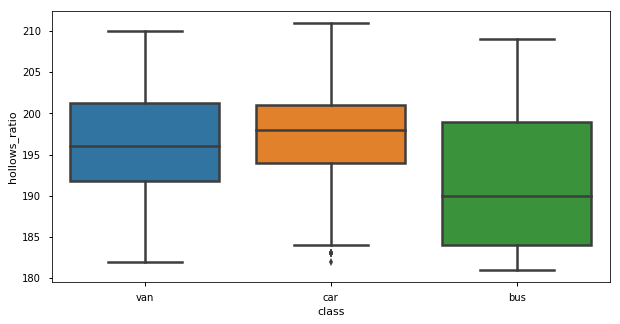

In [135]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="class", y="hollows_ratio", data=vehicles_df)

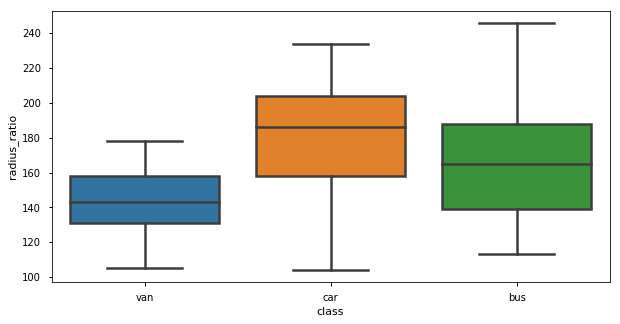

In [136]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="class", y="radius_ratio", data=vehicles_df)

In [138]:
numeric_columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

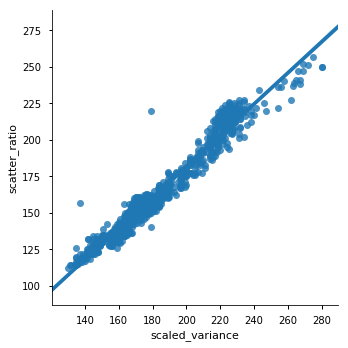

In [139]:
g = sns.lmplot('scaled_variance',"scatter_ratio", vehicles_df);

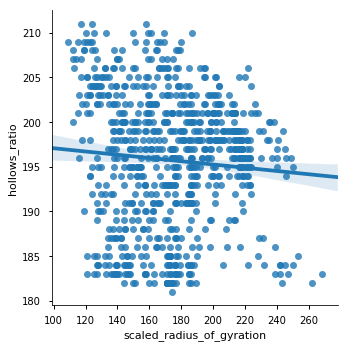

In [140]:
g = sns.lmplot('scaled_radius_of_gyration',"hollows_ratio", vehicles_df);

In [141]:
#Scaled radius of gyration and hollows ratio are nnot linearly correlated

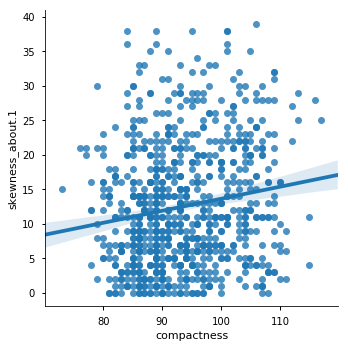

In [142]:
g = sns.lmplot('compactness',"skewness_about.1", vehicles_df);

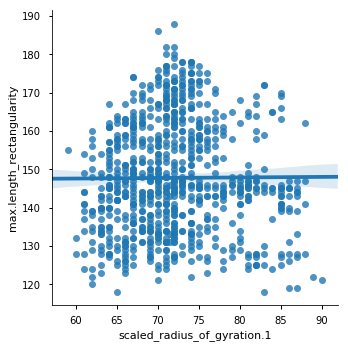

In [143]:
g = sns.lmplot('scaled_radius_of_gyration.1',"max.length_rectangularity", vehicles_df);

In [144]:
#scaled_radius_of_gyration.1 and max.length_rectangularity are highly correlated but are not lineraly separable

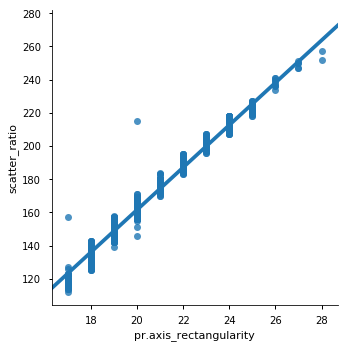

In [145]:
g = sns.lmplot('pr.axis_rectangularity',"scatter_ratio", vehicles_df);

In [146]:
#perfect linear distribution between axis rectangularity and scatter ratio

In [38]:
numeric_columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

# Inference:
### 1. scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, is not corelated and can be removed
### 2. perfect linear distribution between axis rectangularity and scatter ratio
### 3. scaled_radius_of_gyration.1 and max.length_rectangularity are highly correlated but are not lineraly separable
### 4. Scaled radius of gyration and hollows ratio are nnot linearly correlated
### 5.  Radius and hollows ratio and a correlation with the dependent variable class

# Using PCA for Dimensionality Reduction

In [39]:
X=pd.DataFrame()
for cols in vehicles_df.columns:
    if cols!=PredictColumn:
        X[cols]=vehicles_df[cols]
y = vehicles_df[PredictColumn]

In [40]:
X.shape

(808, 18)

In [41]:
y.shape

(808,)

In [42]:
# PCA
# Step 1 - Create covariance matrix
# standardize the data
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)
cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00123916  0.67493761  0.78141476  0.75171347  0.24191671  0.53919984
   0.80508489 -0.78046397  0.80752829  0.66598729  0.78608475  0.80914229
   0.55893749 -0.31841223  0.20255974  0.1523907   0.33692063  0.42092378]
 [ 0.67493761  1.00123916  0.78738297  0.64446784  0.23696033  0.60436474
   0.85014973 -0.81695179  0.8489643   0.96548111  0.81182389  0.8419176
   0.93467559  0.01289171  0.14102026 -0.02666924 -0.08469454  0.08303311]
 [ 0.78141476  0.78738297  1.00123916  0.81530145  0.28550091  0.71131847
   0.9105119  -0.9089854   0.90136318  0.76549988  0.89413969  0.89608836
   0.69519866 -0.30541126  0.09786877  0.26242679  0.16906734  0.37538851]
 [ 0.75171347  0.64446784  0.81530145  1.00123916  0.68786852  0.48828174
   0.8085626  -0.85341333  0.78569006  0.58019597  0.82002395  0.80060461
   0.5549063  -0.44908857  0.03881895  0.18641485  0.44445211  0.5409996 ]
 [ 0.24191671  0.23696033  0.28550091  0.68786852  1.00123916  0.14263389
   0.26023438

In [43]:
#Identify eigen values and eigen vector
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-2.68704462e-01 -8.65589705e-02 -5.86589856e-02  1.27676958e-01
  -1.18074328e-01  2.86715474e-01  1.96277121e-01 -7.67856862e-01
   3.62030649e-01  1.19877826e-01  2.28250568e-02  2.34069479e-03
  -1.12910398e-02 -1.42815091e-01 -9.71925575e-02 -1.03431192e-02
   1.45207895e-02 -5.98193750e-03]
 [-2.81044150e-01  1.63279110e-01 -1.93944995e-01 -4.74450454e-02
   1.24760468e-01 -8.72466330e-02 -3.72036257e-01 -7.38898608e-02
   3.16955275e-02 -2.08006889e-01  6.89267233e-02  7.88345456e-02
  -1.57109127e-02 -8.18546618e-02  1.97124819e-01  1.70725554e-01
   7.38792260e-01  1.06943464e-01]
 [-2.99243464e-01 -2.93826444e-02  6.75986787e-02  1.17596877e-01
   7.55758751e-02 -2.73290639e-02  1.64066288e-01  2.85792947e-01
   2.62629839e-01  1.01823060e-01  7.77915244e-01 -2.48919527e-01
   1.22298609e-02  1.27756559e-01 -2.66437687e-02 -2.98961334e-02
   2.80451968e-02 -1.04021733e-01]
 [-2.75671466e-01 -1.87693677e-01  7.12621744e-02 -2.37701365e-01
  -1.48325427e-01 -1.09

##### In order to decide which eigen vector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigen vectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped. In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigen vectors.

In [44]:
e_vals_a=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
np.concatenate((e_vals_a, e_vals_a),axis=0)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [46]:
e_vals_df=pd.DataFrame(np.vstack((X.columns,e_vals)))
e_vals_df.columns = e_vals_df.iloc[0]
e_vals_df.drop(e_vals_df.index[0])
e_vals_df=e_vals_df.transpose()
e_vals_df.columns=['colnam','evals']
e_vals_df=e_vals_df.reset_index()
e_vals_df.drop(e_vals_df.columns[0],axis=1,inplace=True)
e_vals_df=e_vals_df.sort_values(by=['evals'],ascending=False)

In [47]:
e_vals_df

,colnam,evals
0,compactness,9.97887
1,circularity,3.25085
2,distance_circularity,1.20002
3,radius_ratio,1.13966
4,pr.axis_aspect_ratio,0.852498
5,max.length_aspect_ratio,0.63142
6,scatter_ratio,0.328454
7,elongatedness,0.23774
8,pr.axis_rectangularity,0.115019
9,max.length_rectangularity,0.0786092


### Inference: Top 8 columns is giving maximum correlations has been listed above and top 3 is compactness and circularity and distance circularity

Cumulative Variance Explained [ 55.36956167  73.40748418  80.06600383  86.38963039  91.1198711
  94.62341626  96.44590361  97.76504905  98.40325178  98.83942933
  99.18571311  99.43782686  99.59142307  99.74090753  99.83881032
  99.92004969  99.98116975 100.        ]


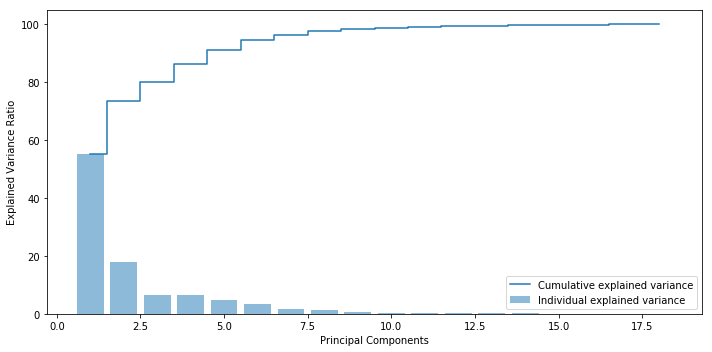

In [51]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [52]:
cor_mat1 = np.corrcoef(X_sd.T)

eig_vals_cor, eig_vecs_cor = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs_cor)
print('\nEigenvalues \n%s' %eig_vals_cor)

Eigenvectors 
[[-2.68704462e-01 -8.65589705e-02 -5.86589856e-02  1.27676958e-01
  -1.18074328e-01  2.86715474e-01  1.96277121e-01 -7.67856862e-01
   3.62030649e-01  1.19877826e-01  2.28250568e-02  2.34069479e-03
  -1.12910398e-02 -1.42815091e-01 -9.71925575e-02 -1.03431192e-02
   1.45207895e-02 -5.98193750e-03]
 [-2.81044150e-01  1.63279110e-01 -1.93944995e-01 -4.74450454e-02
   1.24760468e-01 -8.72466330e-02 -3.72036257e-01 -7.38898608e-02
   3.16955275e-02 -2.08006889e-01  6.89267233e-02  7.88345456e-02
  -1.57109127e-02 -8.18546618e-02  1.97124819e-01  1.70725554e-01
   7.38792260e-01  1.06943464e-01]
 [-2.99243464e-01 -2.93826444e-02  6.75986787e-02  1.17596877e-01
   7.55758751e-02 -2.73290639e-02  1.64066288e-01  2.85792947e-01
   2.62629839e-01  1.01823060e-01  7.77915244e-01 -2.48919527e-01
   1.22298609e-02  1.27756559e-01 -2.66437687e-02 -2.98961334e-02
   2.80451968e-02 -1.04021733e-01]
 [-2.75671466e-01 -1.87693677e-01  7.12621744e-02 -2.37701365e-01
  -1.48325427e-01 -1.09

In [53]:
X.shape

(808, 18)

In [54]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 18 to 8)

pca = PCA(n_components=8)
data_reduced = pca.fit_transform(X_sd)
data_reduced.transpose()

array([[-0.74397659,  1.43513854, -4.15032934, ..., -5.43700676,
         3.23616956,  5.03771383],
       [-0.49596851, -0.36512944,  0.51330076, ...,  0.21982042,
        -1.27950939,  0.14418174],
       [ 0.33259325,  0.38272713,  1.16810314, ...,  0.30513129,
        -1.86145713, -1.23928939],
       ...,
       [-1.97046763, -0.15525698, -0.46500842, ...,  0.16157516,
        -0.10604445,  0.31801772],
       [-0.05739087,  0.21756985,  0.81384596, ...,  0.93262239,
        -0.31226844, -0.42443794],
       [ 0.71997026, -0.12193083, -0.17168814, ...,  0.42360834,
        -0.43315787,  0.2356235 ]])

In [55]:
pca.components_

array([[-2.68704462e-01, -2.81044150e-01, -2.99243464e-01,
        -2.75671466e-01, -1.16498050e-01, -2.10779554e-01,
        -3.06938963e-01,  3.04923884e-01, -3.04197133e-01,
        -2.70970106e-01, -3.00217836e-01, -3.04187512e-01,
        -2.53387919e-01,  7.47552192e-02, -3.60342827e-02,
        -5.69067279e-02, -5.64193668e-02, -1.09295541e-01],
       [-8.65589705e-02,  1.63279110e-01, -2.93826444e-02,
        -1.87693677e-01, -2.39495126e-01, -4.76557497e-02,
         7.87198104e-02, -2.40540589e-02,  8.90586292e-02,
         1.52812095e-01,  6.79307436e-02,  7.94772241e-02,
         2.29956459e-01,  4.99530940e-01, -1.55148793e-02,
        -1.02604351e-01, -5.08980149e-01, -4.98895128e-01],
       [ 5.86589856e-02,  1.93944995e-01, -6.75986787e-02,
        -7.12621744e-02,  1.78034408e-02,  1.23314140e-01,
        -1.09919829e-01,  1.00095470e-01, -1.03131001e-01,
         2.08333085e-01, -1.43255083e-01, -1.07896559e-01,
         2.04182358e-01, -9.50294442e-02,  5.96247349e

In [56]:
data_reduced

array([[-0.74397659, -0.49596851,  0.33259325, ..., -1.97046763,
        -0.05739087,  0.71997026],
       [ 1.43513854, -0.36512944,  0.38272713, ..., -0.15525698,
         0.21756985, -0.12193083],
       [-4.15032934,  0.51330076,  1.16810314, ..., -0.46500842,
         0.81384596, -0.17168814],
       ...,
       [-5.43700676,  0.21982042,  0.30513129, ...,  0.16157516,
         0.93262239,  0.42360834],
       [ 3.23616956, -1.27950939, -1.86145713, ..., -0.10604445,
        -0.31226844, -0.43315787],
       [ 5.03771383,  0.14418174, -1.23928939, ...,  0.31801772,
        -0.42443794,  0.2356235 ]])

In [57]:
datacorr=pd.DataFrame(pca.components_, columns= list(X))

In [58]:
datacorr

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.268704,-0.281044,-0.299243,-0.275671,-0.116498,-0.210780,-0.306939,0.304924,-0.304197,-0.270970,-0.300218,-0.304188,-0.253388,0.074755,-0.036034,-0.056907,-0.056419,-0.109296
1,-0.086559,0.163279,-0.029383,-0.187694,-0.239495,-0.047656,0.078720,-0.024054,0.089059,0.152812,0.067931,0.079477,0.229956,0.499531,-0.015515,-0.102604,-0.508980,-0.498895
2,0.058659,0.193945,-0.067599,-0.071262,0.017803,0.123314,-0.109920,0.100095,-0.103131,0.208333,-0.143255,-0.107897,0.204182,-0.095029,0.596247,-0.637214,0.094379,0.065486
3,0.127677,-0.047445,0.117597,-0.237701,-0.611053,0.287856,0.006793,0.066361,0.032010,0.034718,-0.049734,0.000150,-0.097920,-0.119495,0.434798,0.472398,-0.044136,0.087704
4,0.118074,-0.124760,-0.075576,0.148325,0.169370,-0.585044,0.081530,-0.085539,0.072616,-0.247972,0.141288,0.107209,-0.008296,0.189978,0.587508,0.207249,0.120035,-0.144736
5,0.286715,-0.087247,-0.027329,-0.109396,-0.580804,-0.339271,0.112376,-0.102340,0.113712,-0.117540,0.161871,0.150254,-0.107548,-0.084178,-0.252796,-0.437819,0.267929,0.019332
6,0.196277,-0.372036,0.164066,0.149080,0.131754,0.423780,0.083563,-0.084002,0.088337,-0.324954,0.061927,0.063797,-0.467829,0.082432,0.138772,-0.306509,-0.271212,-0.170911
7,0.767857,0.073890,-0.285793,-0.051567,0.161352,0.046644,-0.089572,0.222584,-0.035113,0.241144,-0.160328,-0.057187,-0.135403,0.301287,-0.122692,0.130967,0.071764,-0.000008


In [59]:
def svc_param_selection(model,X, y, nfolds):
    Cs = [0.01, 0.05, 0.5, 1]
    gammas = [0.01, 0.05, 0.5, 1]
    kernels= ['rbf','linear']

    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
    grid_search = GridSearchCV(model, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search

In [60]:
from sklearn.model_selection import cross_val_score
X=data_reduced

clf = svm.SVC(kernel='linear', C=1)
kfold = KFold(n_splits=X.shape[0], random_state=7)
result = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.8762376237623762


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)
grid_search = svc_param_selection(clf,X_train,y_train,10)
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, grid_search.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}

Grid scores on development set:

0.525 (+/-0.020) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         bus       0.93      0.98      0.95       105
         car       0.95      0.95      0.95       204
         van       0.94      0.89      0.92        95

    accuracy                           0.94       404
   macro avg       0.94      0.94      0.94       404
weighted avg       0.94      0.94      0.94       404


0.849 (+/-0.134) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         bus       0.93      0.98 

              precision    recall  f1-score   support

         bus       0.93      0.98      0.95       105
         car       0.95      0.95      0.95       204
         van       0.94      0.89      0.92        95

    accuracy                           0.94       404
   macro avg       0.94      0.94      0.94       404
weighted avg       0.94      0.94      0.94       404


0.871 (+/-0.124) for {'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         bus       0.93      0.98      0.95       105
         car       0.95      0.95      0.95       204
         van       0.94      0.89      0.92        95

    accuracy                           0.94       404
   macro avg       0.94      0.94      0.94       404
weighted avg       0.94      0.94      0.94       404


0.879 (+/-0.075) for {'C': 0.5, 'ga

In [62]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
grid_result=grid_search.best_params_
clf = svm.SVC(kernel=grid_result['kernel'], C=grid_result['C'],gamma=grid_result['gamma'])
clf.fit(X_train,y_train)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()
print(accuracy_score(y_test, y_pred)*100)

Best parameters set found on development set:

{'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         bus       0.93      0.98      0.95       105
         car       0.95      0.95      0.95       204
         van       0.94      0.89      0.92        95

    accuracy                           0.94       404
   macro avg       0.94      0.94      0.94       404
weighted avg       0.94      0.94      0.94       404


94.3069306930693
